# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle


# Visualizations will be shown in the notebook.
%matplotlib inline

os.environ["CUDA_VISIBLE_DEVICES"]="0"

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
labels = pandas.read_csv('signnames.csv')
n_classes = labels.shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Class  0: Speed limit (20km/h)                                          180  samples
Class  1: Speed limit (30km/h)                                          1980 samples
Class  2: Speed limit (50km/h)                                          2010 samples
Class  3: Speed limit (60km/h)                                          1260 samples
Class  4: Speed limit (70km/h)                                          1770 samples
Class  5: Speed limit (80km/h)                                          1650 samples
Class  6: End of speed limit (80km/h)                                   360  samples
Class  7: Speed limit (100km/h)                                         1290 samples
Class  8: Speed limit (120km/h)                                         1260 samples
Class  9: No passing                                                    1320 samples
Class 10: No passing for vehicles over 3.5 metric tons                  1800 samples
Class 11: Right-of-way at the next intersection                  

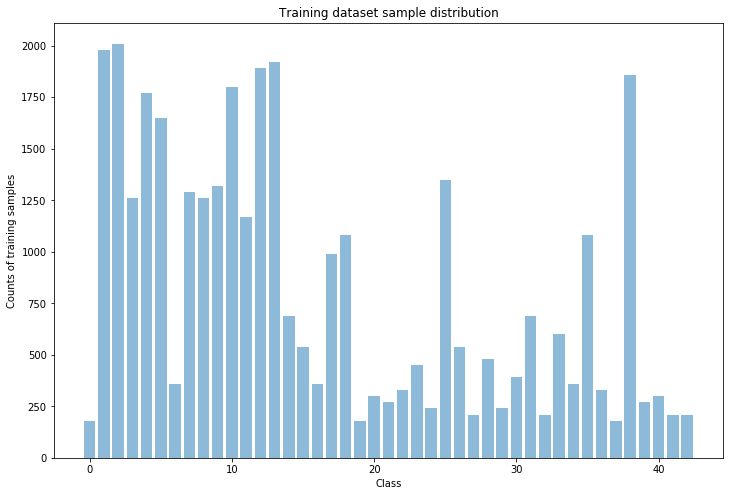

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

list_c = {}
count = []
for i in range(n_classes):
    list_c[i] = []
for i in range(len(y_train)):
    list_c[y_train[i]].append(i)

    
for i in range(n_classes):
    count.append(len(list_c[i]))
    print('Class {:2d}: {:<60}  {:<4d} samples'.format(i, labels.SignName[i], count[i]))
plt.figure(figsize=(12, 8))
plt.bar(np.arange(43), count, align='center',alpha=0.5)
plt.xlabel('Class')
plt.ylabel('Counts of training samples')
plt.title('Training dataset sample distribution')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

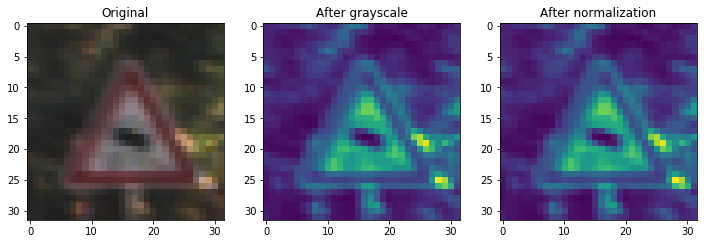

In [4]:
X_train, y_train = shuffle(X_train, y_train)

#Visualize the original image
plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
plt.imshow(X_train[0])
plt.title('Original')

# Convert to grayscale
# I tried some many methods: like this below one, tf.image.rgb_to_grayscale, cv2.cvtColor. 
# And also np.dot(rgb[...,:3], [0.299, 0.587, 0.114]). I am wondering why the images are not grayscaled. Maybe the original dataset?

X_train_rgb = X_train
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_train = X_train_gray

#Visualize the grascaled image
plt.subplot(1,3,2)
plt.imshow(X_train[0].squeeze())
plt.title('After grayscale')

# Normalize the images
X_train = (X_train - 128)/128

#Visualize the nomalized image
plt.subplot(1,3,3)
plt.imshow(X_train[0].squeeze())
plt.title('After normalization')

# DO grayscale and normalization for test and validation dataset
X_test_rgb = X_test
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_test = X_test_gray
X_test = (X_test - 128)/128

X_valid_rgb = X_valid
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)
X_valid = X_valid_gray
X_valid = (X_valid - 128)/128

## Model Architecture

### Define model paramters

In [5]:
EPOCHS = 30
BATCH_SIZE = 32
rate = 0.001

### Using LeNet5 model

In [6]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 300.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Features and Labels
Create a placeholder for a batch of grayscaled input images

In [7]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

### Training Pipeline

In [8]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation
Evaluate the loss and accuracy of the model for a given dataset

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training...

EPOCH 1  Validation Accuracy = 0.838
EPOCH 2  Validation Accuracy = 0.902
EPOCH 3  Validation Accuracy = 0.899
EPOCH 4  Validation Accuracy = 0.907
EPOCH 5  Validation Accuracy = 0.912
EPOCH 6  Validation Accuracy = 0.924
EPOCH 7  Validation Accuracy = 0.935
EPOCH 8  Validation Accuracy = 0.931
EPOCH 9  Validation Accuracy = 0.932
EPOCH 10 Validation Accuracy = 0.924
EPOCH 11 Validation Accuracy = 0.928
EPOCH 12 Validation Accuracy = 0.917
EPOCH 13 Validation Accuracy = 0.937
EPOCH 14 Validation Accuracy = 0.936
EPOCH 15 Validation Accuracy = 0.932
EPOCH 16 Validation Accuracy = 0.922
EPOCH 17 Validation Accuracy = 0.944
EPOCH 18 Validation Accuracy = 0.935
EPOCH 19 Validation Accuracy = 0.931
EPOCH 20 Validation Accuracy = 0.932
EPOCH 21 Validation Accuracy = 0.950
EPOCH 22 Validation Accuracy = 0.909
EPOCH 23 Validation Accuracy = 0.933
EPOCH 24 Validation Accuracy = 0.946
EPOCH 25 Validation Accuracy = 0.935
EPOCH 26 Validation Accuracy = 0.941
EPOCH 27 Validation Accur

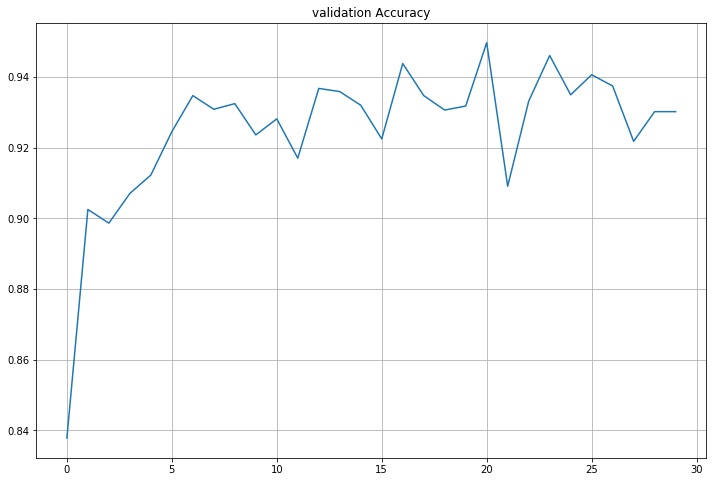

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    validation_result=[]
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})

        validation_accuracy = evaluate(X_valid, y_valid)
        validation_result.append(validation_accuracy)
        
        print("EPOCH {:<2d} ".format(i+1) + "Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")
    
    
# plot the validation accuracy
plt.figure(figsize=(12, 8))
plt.plot(validation_result)
plt.title("validation Accuracy")
plt.grid()

In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.927


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

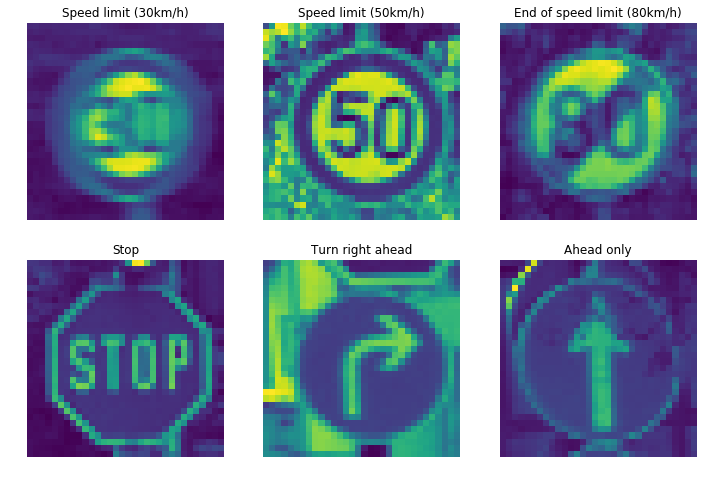

In [12]:
#Import test images  
import cv2
import glob

figures = []
labels_y = {}
test_img = sorted(glob.glob('./Images/*.png'))
test_y = np.array([1,2,6,14,33,35])

for i, imp in enumerate(test_img):
    img=cv2.imread(imp, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (32,32))
    figures.append(img)
    labels_y[i] = test_y[i]

figures = np.array(figures)
figures_gray = np.sum(figures/3, axis=3, keepdims=True)

plt.figure(figsize=(12, 8))
for i in range(len(figures_gray)):
    plt.subplot(2,3,i+1)
    plt.imshow(figures_gray[i].squeeze())
    plt.title(labels.SignName[test_y[i]])
    plt.axis('off')


### Predict the Sign Type for Each Image

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    y_pred = sess.run(tf.argmax(logits, 1), feed_dict={x: figures_gray, keep_prob: 1.0})
    my_accuracy = evaluate(figures_gray, test_y)

INFO:tensorflow:Restoring parameters from ./lenet


### Analyze Performance


Data Set Accuracy = 1.000


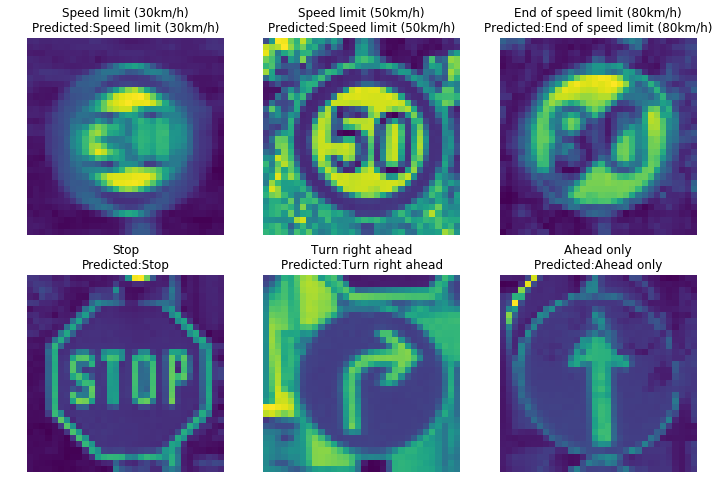

In [14]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
plt.figure(figsize=(12, 8))
for i in range(len(figures_gray)):
    plt.subplot(2,3,i+1)
    plt.imshow(figures_gray[i].squeeze())
    plt.title(labels.SignName[test_y[i]] + '\nPredicted:'+labels.SignName[y_pred[i]])
    plt.axis('off')
    
print("\nData Set Accuracy = {:.3f}".format(my_accuracy))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


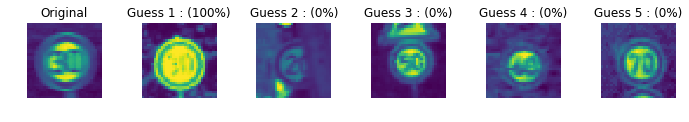

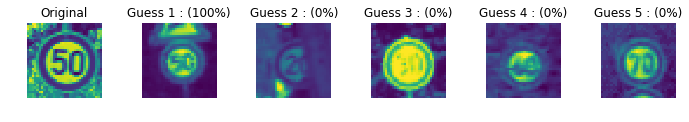

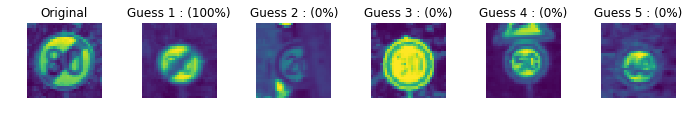

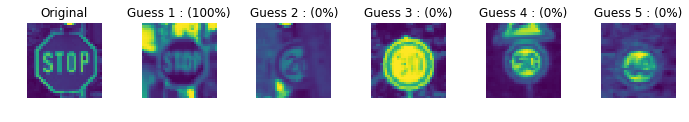

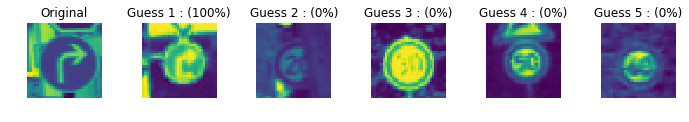

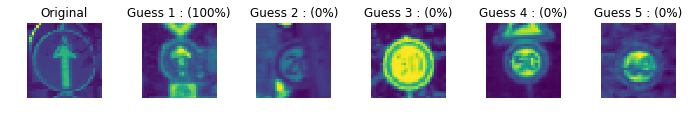

In [15]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: figures_gray, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: figures_gray, keep_prob: 1.0})
#     print(my_top_k)

    for i in range(6):
        figures = {}
        labels_sm = {}
        
        figures[0] = figures_gray[i].squeeze()
        labels_sm[0] = "Original"
        
        for j in range(k_size):
            labels_sm[j+1] = 'Guess {} : ({:.0f}%)'.format(j+1, 100*my_top_k[0][i][j])
            figures[j+1] = X_valid[np.argwhere(y_valid == my_top_k[1][i][j])[0]].squeeze()

        plt.figure(figsize=(12, 8))
        for i in range(len(figures)):
            plt.subplot(k_size,len(figures),i+1);
            plt.imshow(figures[i])
            plt.title(labels_sm[i])
            plt.axis('off')